In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# **1. Load and Clean Data**

In [2]:
#read dataset
df = pd.read_csv('RecursionCohortData_27339_2001-01-01_2022-07-01_1657909974300.csv')

Now let us look at what the information of our dataset. Chris said that he used -999 for N/A value. There are nan values in both 'Orig LTV Desciption' and  'Credit Score Description' columns, but we don't need to replace those values becuase they are description. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Bank Servicer(Y/N)                    2496 non-null   object 
 1   Orig LTV                              2501 non-null   int64  
 2   Orig LTV Description                  2501 non-null   object 
 3   Credit Score                          2501 non-null   int64  
 4   Credit Score Description              2501 non-null   object 
 5   Factor Date                           2501 non-null   object 
 6   Current Remaining Principal Balance   2501 non-null   float64
 7   Item Count                            2501 non-null   int64  
 8   Weighted Average Gross Coupon         2501 non-null   float64
 9   Weighted Average Maturity             2501 non-null   float64
 10  Weighted Average Loan Age             2501 non-null   float64
 11  Weighted Average 

In [4]:
df.columns

Index(['Bank Servicer(Y/N)', 'Orig LTV', 'Orig LTV Description',
       'Credit Score', 'Credit Score Description', 'Factor Date',
       'Current Remaining Principal Balance ', 'Item Count ',
       'Weighted Average Gross Coupon ', 'Weighted Average Maturity ',
       'Weighted Average Loan Age ', 'Weighted Average Original Loan Size ',
       'Weighted Average Loan Size ', 'Original Loan Amount ', 'CPR 1M ',
       'CDR 1M ', 'CCR 1M (Curtailment) '],
      dtype='object')

In [5]:
df.head()

,Bank Servicer(Y/N),Orig LTV,Orig LTV Description,Credit Score,Credit Score Description,Factor Date,Current Remaining Principal Balance,Item Count,Weighted Average Gross Coupon,Weighted Average Maturity,Weighted Average Loan Age,Weighted Average Original Loan Size,Weighted Average Loan Size,Original Loan Amount,CPR 1M,CDR 1M,CCR 1M (Curtailment)
0,N,-999,N.A.,-999,N.A.,7/1/2022,2.177325e+10,147332,4.406054,338.912020,91.007777,236477.4371,202495.7865,2.630744e+10,NaN,NaN,NaN
1,N,-999,N.A.,680,<=680,7/1/2022,7.269392e+07,636,3.630607,329.901856,28.439182,145947.9172,139133.1410,7.708400e+07,NaN,NaN,NaN
2,N,-999,N.A.,750,>680 and <=750,7/1/2022,7.726510e+07,620,3.434372,331.560343,23.936819,162110.3959,154341.8838,8.115500e+07,NaN,NaN,NaN
3,N,-999,N.A.,29999,>750,7/1/2022,3.129921e+07,245,3.346467,327.675719,25.915448,174182.9081,164687.4867,3.394000e+07,NaN,NaN,NaN
4,N,80,<=80,-999,N.A.,7/1/2022,5.170670e+08,3850,4.058299,260.348302,51.254905,268204.3842,240469.7537,6.569670e+08,NaN,NaN,NaN


In [6]:
#replace nan values by 0, and replace the initial dataframe
df.fillna(0,inplace = True)

# **2. Data Visualization**

In [7]:
#sort data by 'Factor Date' from old to new
df.sort_values(by=['Factor Date'], ascending=True, inplace=True)
df['Factor Date']=pd.to_datetime(df['Factor Date'])
df = df[df['Factor Date'] < '2022-7-1']

Now, let us plot some graphs. 

<AxesSubplot:xlabel='Factor Date', ylabel='CPR 1M '>

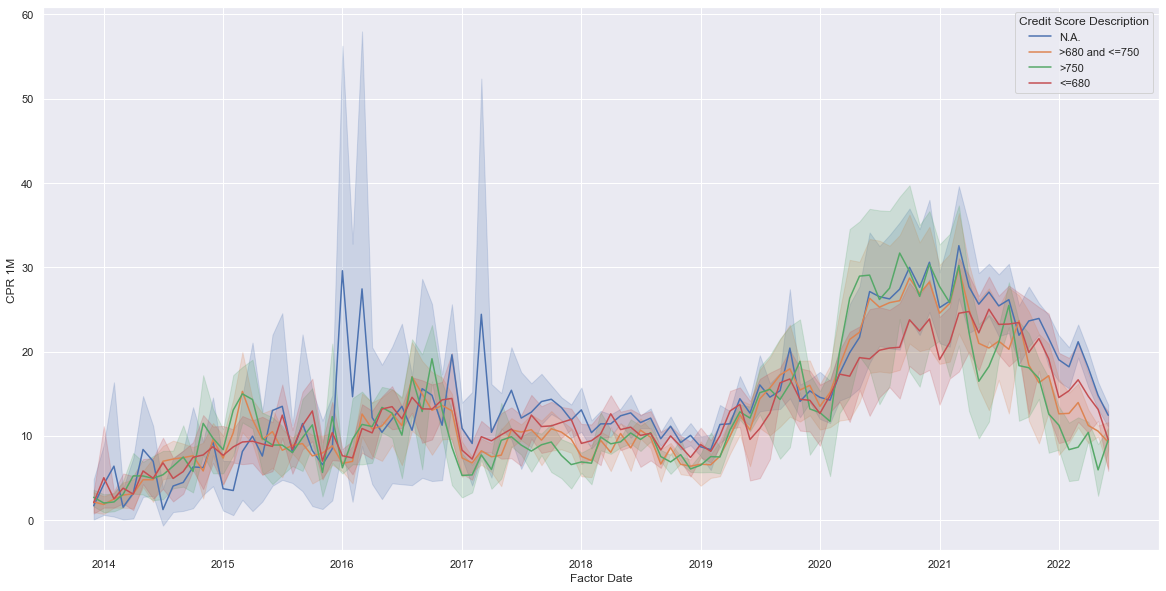

In [8]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.lineplot(data=df, x='Factor Date', y= 'CPR 1M ', hue ='Credit Score Description')

<AxesSubplot:xlabel='Factor Date', ylabel='CPR 1M '>

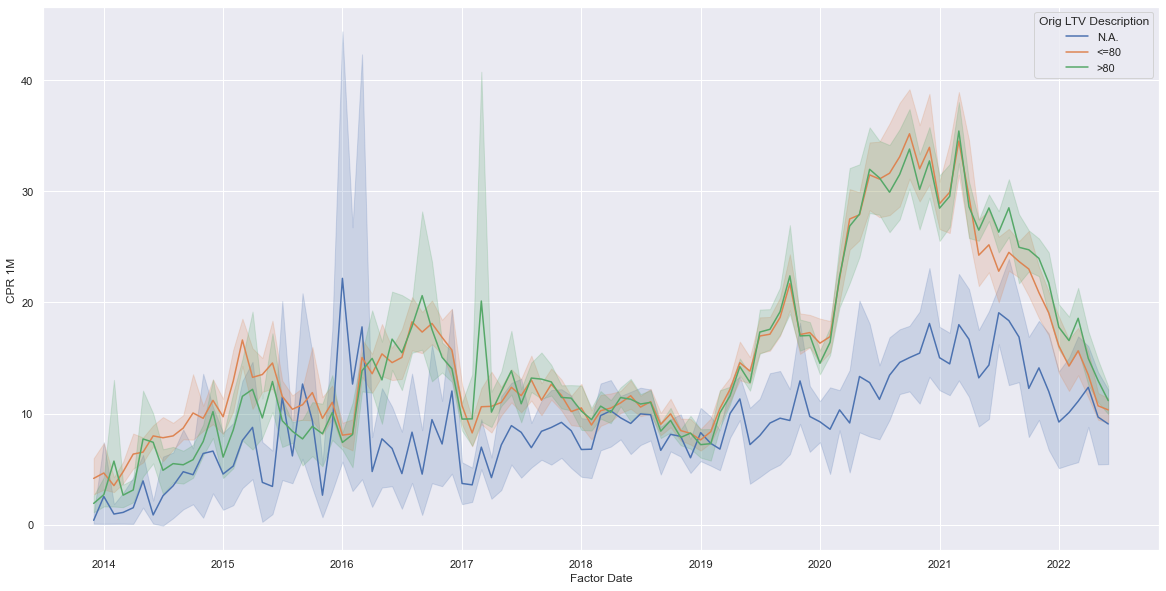

In [9]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.lineplot(data=df, x='Factor Date', y= 'CPR 1M ', hue ='Orig LTV Description')

It seems like that we have too many data in 'Factor Date' and we can not see every single date very clearly. Let us look a specific period. I am interested in covid period, so I plot graph from 2020-2022. 

In [10]:
#define dataframe after covid time
df_covid = df[df['Factor Date']>'2019-12-1']

In [11]:
df_covid.head()

,Bank Servicer(Y/N),Orig LTV,Orig LTV Description,Credit Score,Credit Score Description,Factor Date,Current Remaining Principal Balance,Item Count,Weighted Average Gross Coupon,Weighted Average Maturity,Weighted Average Loan Age,Weighted Average Original Loan Size,Weighted Average Loan Size,Original Loan Amount,CPR 1M,CDR 1M,CCR 1M (Curtailment)
727,N,-999,N.A.,750,>680 and <=750,2020-01-01,9.050025e+07,674,4.415835,357.897893,62.742825,176130.4065,159539.4468,9.999800e+07,9.488754,0.0,0.212392
735,N,29999,>80,750,>680 and <=750,2020-01-01,2.797380e+11,1302677,4.351093,317.636102,31.058750,286650.2389,271461.7129,2.996010e+11,16.726801,0.0,0.416761
728,N,-999,N.A.,29999,>750,2020-01-01,1.903624e+07,169,4.285623,317.461956,56.052210,171346.2301,150681.5697,2.230100e+07,5.043276,0.0,2.404894
729,N,80,<=80,-999,N.A.,2020-01-01,6.538415e+08,4673,4.527041,292.307395,53.053017,246066.8046,220007.9261,7.883150e+08,22.320664,0.0,1.650345
730,N,80,<=80,680,<=680,2020-01-01,1.393960e+11,822997,4.550802,292.705561,37.996532,257684.0772,239115.6967,1.543120e+11,18.509062,0.0,0.457410


Now, let us plot graph for this specific period of time. 

<AxesSubplot:xlabel='Factor Date', ylabel='CPR 1M '>

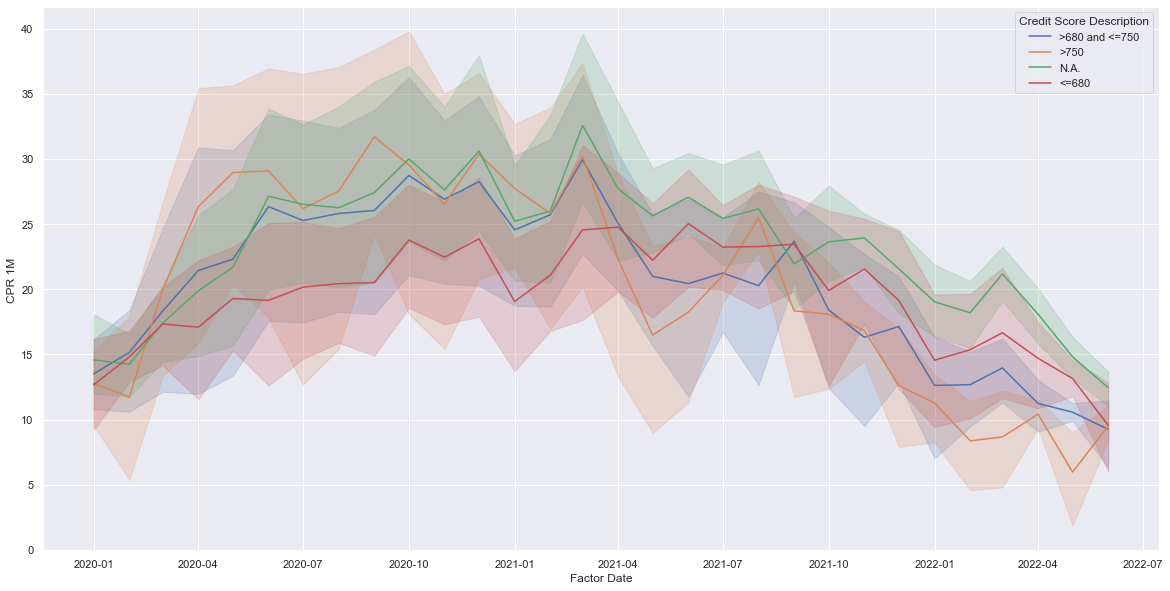

In [12]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.lineplot(data=df_covid, x='Factor Date', y= 'CPR 1M ', hue ='Credit Score Description')

<AxesSubplot:xlabel='Factor Date', ylabel='CPR 1M '>

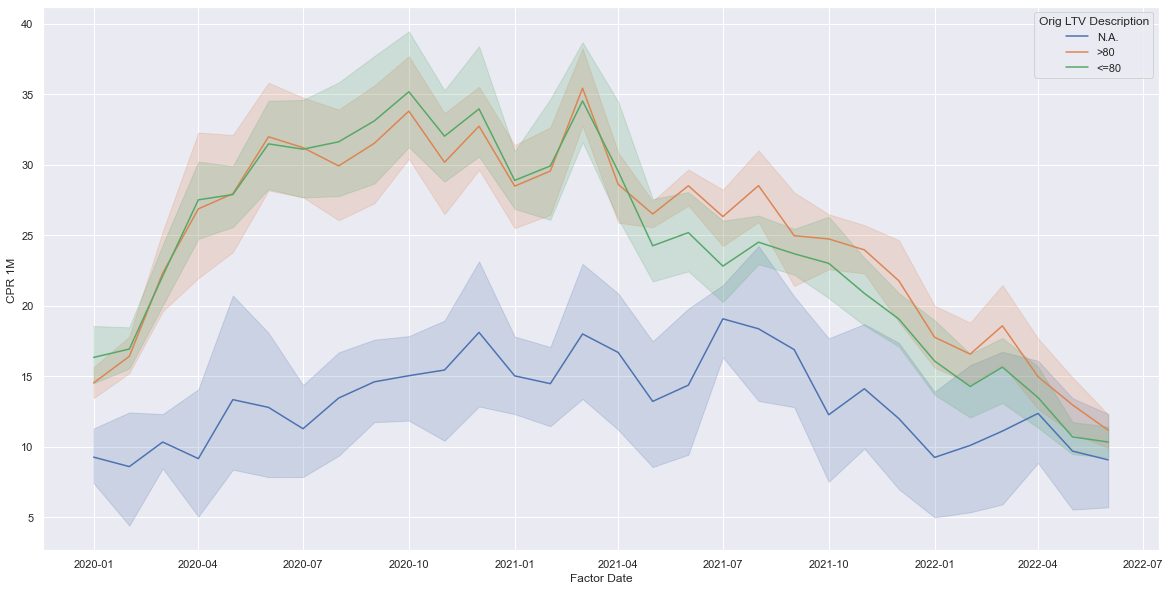

In [13]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.lineplot(data=df_covid, x='Factor Date', y= 'CPR 1M ', hue ='Orig LTV Description')

<AxesSubplot:xlabel='Factor Date', ylabel='CPR 1M '>

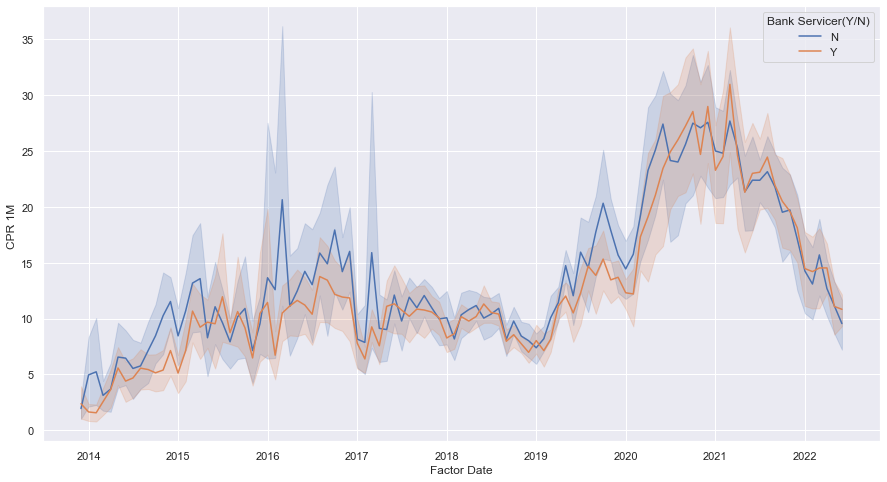

In [14]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=df, x='Factor Date', y= 'CPR 1M ', hue ='Bank Servicer(Y/N)')

You guys can play around by changing 'hue' to other categorial features

<AxesSubplot:xlabel='Credit Score Description', ylabel='CPR 1M '>

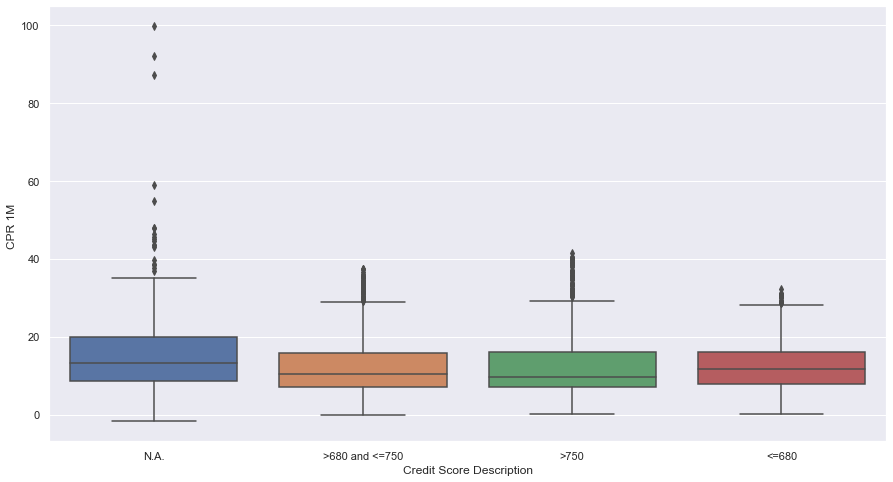

In [15]:
sns.boxplot(x="Credit Score Description", y="CPR 1M ", data=df)

<AxesSubplot:xlabel='Orig LTV Description', ylabel='CPR 1M '>

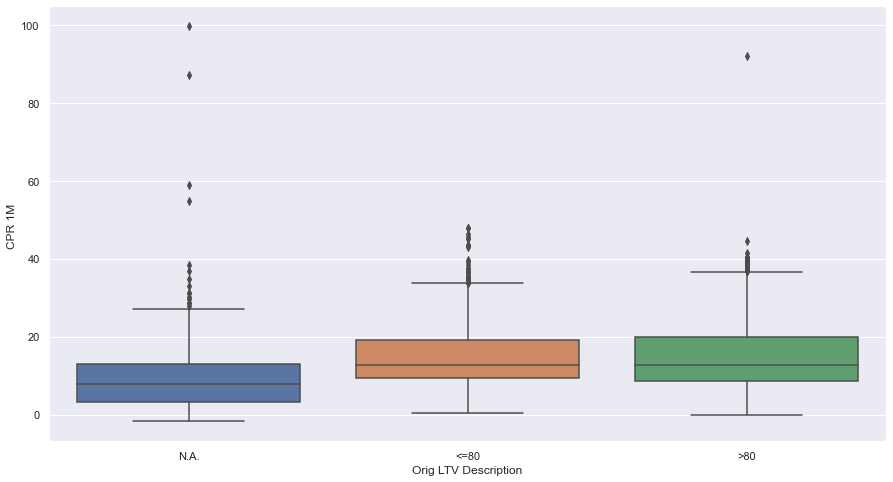

In [16]:
sns.boxplot(x='Orig LTV Description', y="CPR 1M ", data=df)

# **3. Statistical Analysis**

Now, I  make a correlation matrix plot to see their correlations.

In [17]:
# import library
import matplotlib.pyplot as plt

In [18]:
# Identiy numerical features
num_features = pd.Index(['Current Remaining Principal Balance ', 'Item Count ', 
 'Weighted Average Gross Coupon ', 'Weighted Average Maturity ','Weighted Average Loan Age ', 
 'Weighted Average Original Loan Size ','Weighted Average Loan Size ', 'Original Loan Amount ', 'CPR 1M '])

In [19]:
# Define a dataframe that only contains numerical features
num_df = df[num_features]

In [20]:
# Correlation matrix
cormat = num_df.corr()
round(cormat, 2)

,Current Remaining Principal Balance,Item Count,Weighted Average Gross Coupon,Weighted Average Maturity,Weighted Average Loan Age,Weighted Average Original Loan Size,Weighted Average Loan Size,Original Loan Amount,CPR 1M
Current Remaining Principal Balance,1.00,0.99,-0.38,-0.21,-0.16,0.56,0.55,1.00,0.23
Item Count,0.99,1.00,-0.36,-0.24,-0.15,0.56,0.54,0.99,0.23
Weighted Average Gross Coupon,-0.38,-0.36,1.00,-0.47,0.73,-0.28,-0.34,-0.38,0.04
Weighted Average Maturity,-0.21,-0.24,-0.47,1.00,-0.45,-0.13,-0.06,-0.22,-0.20
Weighted Average Loan Age,-0.16,-0.15,0.73,-0.45,1.00,-0.23,-0.35,-0.15,0.22
Weighted Average Original Loan Size,0.56,0.56,-0.28,-0.13,-0.23,1.00,0.99,0.55,0.39
Weighted Average Loan Size,0.55,0.54,-0.34,-0.06,-0.35,0.99,1.00,0.54,0.34
Original Loan Amount,1.00,0.99,-0.38,-0.22,-0.15,0.55,0.54,1.00,0.23
CPR 1M,0.23,0.23,0.04,-0.20,0.22,0.39,0.34,0.23,1.00


I inlcude the feature 'Itemm Count' just because it is a numerical feature. We can just ignore now. Let us look at the last column or last row. We observe that 'Weighted Average Maturity' has negative correlation with 'CPR 1M'. The 'Weighted Average Gross Coupon' has almost zero correlation. Two features that has relatively high correlation are 'Weighted Average Original Loan Size' and 'Weighted Average Loan Size'. The correlation between 'Weighted Average Original Loan Size' and 'Weighted Average Loan Size' is 0.99, which is very close to 1. We can ignore one of them when we build up a model. 

Now, let us drop 'Item Count' and 'Weighted Average Original Loan Size' to plot a clear graph. 

<AxesSubplot:>

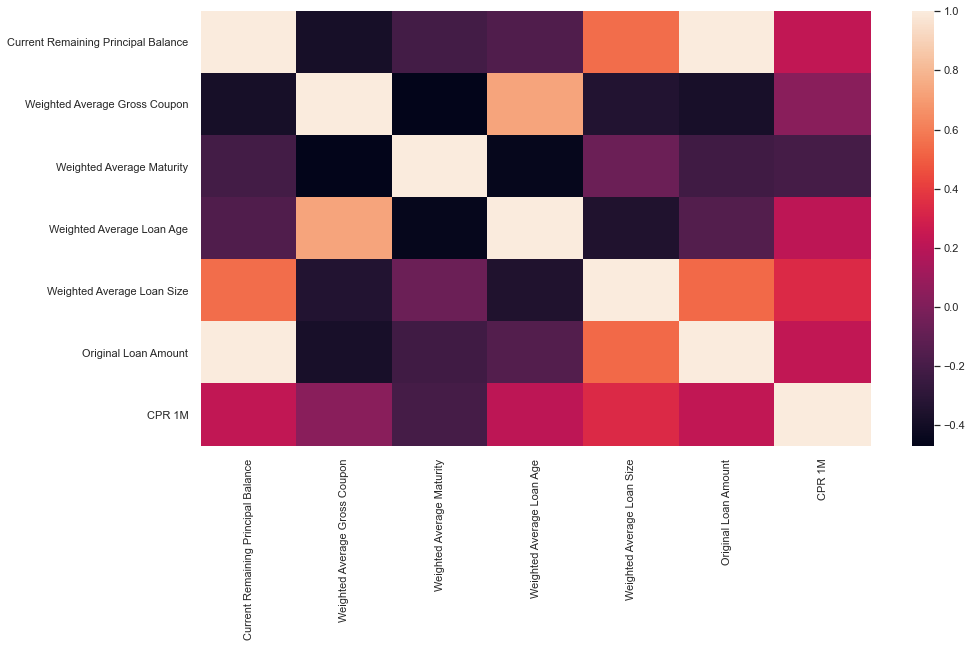

In [21]:
df_new = num_df.drop(['Item Count ', 'Weighted Average Original Loan Size '], axis=1)
cormat_new = df_new.corr()
sns.heatmap(cormat_new)

# **4. Linear regression**

### **4.1 Define and train model**

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
#Only look at period before covid
before_covid = df[df['Factor Date']<'2020-01-01']
before_covid = before_covid.sort_values(by='Factor Date')
before_covid = before_covid.set_index('Factor Date')

In [24]:
#Create dataset that has high LTV and high credit score
bank = before_covid[before_covid['Bank Servicer(Y/N)'] == 'Y']
bank_high_LTV = bank[bank['Orig LTV Description'] == '>80']
bh_LTV_hC = bank_high_LTV[bank_high_LTV['Credit Score Description'] == '>750']

In [25]:
bh_LTV_hC

,Bank Servicer(Y/N),Orig LTV,Orig LTV Description,Credit Score,Credit Score Description,Current Remaining Principal Balance,Item Count,Weighted Average Gross Coupon,Weighted Average Maturity,Weighted Average Loan Age,Weighted Average Original Loan Size,Weighted Average Loan Size,Original Loan Amount,CPR 1M,CDR 1M,CCR 1M (Curtailment)
Factor Date,,,,,,,,,,,,,,,,
2013-12-01,Y,29999,>80,29999,>750,5.179322e+10,260507,3.860541,322.846773,6.738061,250716.6592,246940.4405,5.266769e+10,2.708637,0.0,0.476368
2014-01-01,Y,29999,>80,29999,>750,5.332615e+10,268147,3.886059,322.607663,7.452355,251311.5935,247161.1591,5.431558e+10,2.386477,0.0,0.506896
2014-02-01,Y,29999,>80,29999,>750,5.354497e+10,270785,3.905281,321.744981,8.252455,250725.0957,246148.3394,5.464353e+10,2.802298,0.0,0.501593
2014-03-01,Y,29999,>80,29999,>750,5.499918e+10,278757,3.924004,321.125344,9.019433,250683.3389,245711.1060,5.622741e+10,3.644773,0.0,0.516502
2014-04-01,Y,29999,>80,29999,>750,5.603249e+10,284623,3.938261,320.419062,9.816663,250649.2759,245255.3958,5.739137e+10,4.431987,0.0,0.591929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,Y,29999,>80,29999,>750,3.082850e+11,1574100,4.134660,296.936990,43.528753,272598.8260,248451.4925,3.474310e+11,17.109205,0.0,0.938439
2019-09-01,Y,29999,>80,29999,>750,3.104790e+11,1581880,4.130966,297.143629,43.539141,273527.8510,249337.5072,3.500540e+11,19.509630,0.0,0.832260
2019-10-01,Y,29999,>80,29999,>750,3.123500e+11,1588262,4.123423,297.298475,43.558851,274417.8150,250175.6600,3.523200e+11,20.880536,0.0,0.856876


In [26]:
# Make lag features for 'CPR_1M'
def make_lags(ts, lags):
    return pd.concat(
        {
            f'CPR_1M_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)


X = make_lags(bh_LTV_hC['CPR 1M '], lags=3)

In [27]:
X = X.fillna(0.0)

In [28]:
X

,CPR_1M_lag_1,CPR_1M_lag_2,CPR_1M_lag_3
Factor Date,,,
2013-12-01,0.000000,0.000000,0.000000
2014-01-01,2.708637,0.000000,0.000000
2014-02-01,2.386477,2.708637,0.000000
2014-03-01,2.802298,2.386477,2.708637
2014-04-01,3.644773,2.802298,2.386477
...,...,...,...
2019-08-01,16.060485,12.096005,12.531279
2019-09-01,17.109205,16.060485,12.096005
2019-10-01,19.509630,17.109205,16.060485


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create target series and data splits
y = bh_LTV_hC['CPR 1M ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=12, shuffle=False)

# Fit and predict
model = LinearRegression()  # This is just a simple linear regression model with 3 features (Input)
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

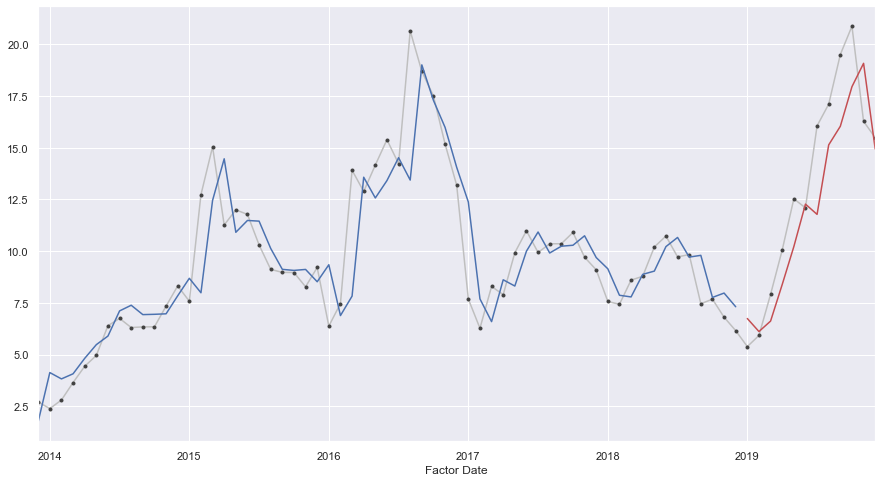

In [30]:
#Plot time series
import matplotlib.pyplot as plt

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

The grey dot line is a plot for historical data. The blue line is a fitted line based on simple linear regression model. Finally, the red line is our prediction. Surprisingly, it not too bad. Now let us take all other numerical features into account. 

In [31]:
X_all_fe = pd.concat([bh_LTV_hC, X], axis=1)

In [32]:
X_all_fe.columns

Index(['Bank Servicer(Y/N)', 'Orig LTV', 'Orig LTV Description',
       'Credit Score', 'Credit Score Description',
       'Current Remaining Principal Balance ', 'Item Count ',
       'Weighted Average Gross Coupon ', 'Weighted Average Maturity ',
       'Weighted Average Loan Age ', 'Weighted Average Original Loan Size ',
       'Weighted Average Loan Size ', 'Original Loan Amount ', 'CPR 1M ',
       'CDR 1M ', 'CCR 1M (Curtailment) ', 'CPR_1M_lag_1', 'CPR_1M_lag_2',
       'CPR_1M_lag_3'],
      dtype='object')

In [33]:
features  = ['Current Remaining Principal Balance ', 'Weighted Average Gross Coupon ', 'Weighted Average Maturity ',
       'Weighted Average Loan Age ', 'Weighted Average Original Loan Size ', 'Original Loan Amount ', 
        'CPR_1M_lag_1', 'CPR_1M_lag_2','CPR_1M_lag_3']

In [34]:
# Create target series and data splits
y1 = X_all_fe['CPR 1M ']
X1_train, X1_test, y1_train, y1_test = train_test_split(X_all_fe[features], y1, test_size=12, shuffle=False)

In [35]:
y1_train

Factor Date
2013-12-01    2.708637
2014-01-01    2.386477
2014-02-01    2.802298
2014-03-01    3.644773
2014-04-01    4.431987
                ...   
2018-08-01    9.835572
2018-09-01    7.457835
2018-10-01    7.679847
2018-11-01    6.805450
2018-12-01    6.156708
Name: CPR 1M , Length: 61, dtype: float64

In [36]:
# Fit and predict
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [37]:
y1_pred = pd.Series(model1.predict(X1_train), index=y1_train.index)
y1_fore = pd.Series(model1.predict(X1_test), index=y1_test.index)

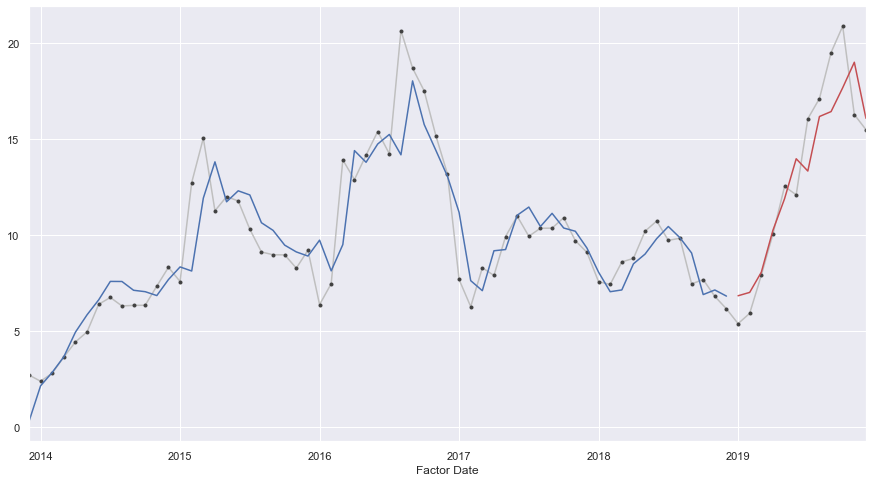

In [38]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

ax = y1.plot(**plot_params)
ax = y1_pred.plot(ax=ax)
_ = y1_fore.plot(ax=ax, color='C3')

Let us see how this model behaves for the whole period including covid period. 

In [39]:
#Look at period after covid
covid = df[df['Factor Date']>='2016-06-01']
covid = covid.sort_values(by='Factor Date')
covid = covid.set_index('Factor Date')

In [40]:
covid.head()

,Bank Servicer(Y/N),Orig LTV,Orig LTV Description,Credit Score,Credit Score Description,Current Remaining Principal Balance,Item Count,Weighted Average Gross Coupon,Weighted Average Maturity,Weighted Average Loan Age,Weighted Average Original Loan Size,Weighted Average Loan Size,Original Loan Amount,CPR 1M,CDR 1M,CCR 1M (Curtailment)
Factor Date,,,,,,,,,,,,,,,,
2016-06-01,Y,29999,>80,29999,>750,9.382916e+10,481738,4.003303,310.829661,24.455111,255624.9429,242498.9249,9.973711e+10,15.392090,0.0,0.647242
2016-06-01,N,-999,N.A.,750,>680 and <=750,4.480282e+07,411,3.953235,321.187602,31.066709,145255.1911,136547.3770,4.767881e+07,9.833348,0.0,0.094043
2016-06-01,Y,-999,N.A.,-999,N.A.,3.100469e+06,27,3.913866,308.002425,49.761851,166841.5704,154415.0279,3.395752e+06,0.207320,0.0,0.207320
2016-06-01,Y,80,<=80,680,<=680,3.821508e+10,252920,4.190560,281.543538,22.987739,226858.1431,214699.3737,4.093424e+10,13.891659,0.0,0.454764
2016-06-01,N,29999,>80,29999,>750,1.006760e+11,490703,4.112812,318.028761,20.479262,261468.0026,250943.4092,1.056160e+11,16.370882,0.0,0.566926


In [41]:
#Create dataset that has high LTV and high credit score and 'Bank Servicer(Y/N)' = 'Y'
df_covid = covid[covid['Bank Servicer(Y/N)'] == 'Y']
df_covid = df_covid[df_covid['Orig LTV Description'] == '>80']
df_covid = df_covid[df_covid['Credit Score Description'] == '>750']

In [42]:
df_covid

,Bank Servicer(Y/N),Orig LTV,Orig LTV Description,Credit Score,Credit Score Description,Current Remaining Principal Balance,Item Count,Weighted Average Gross Coupon,Weighted Average Maturity,Weighted Average Loan Age,Weighted Average Original Loan Size,Weighted Average Loan Size,Original Loan Amount,CPR 1M,CDR 1M,CCR 1M (Curtailment)
Factor Date,,,,,,,,,,,,,,,,
2016-06-01,Y,29999,>80,29999,>750,9.382916e+10,481738,4.003303,310.829661,24.455111,255624.9429,242498.9249,9.973711e+10,15.392090,0.000000,0.647242
2016-07-01,Y,29999,>80,29999,>750,9.539310e+10,489141,3.996364,310.809156,24.704625,256162.5675,242889.8179,1.014820e+11,14.231637,0.000000,0.650160
2016-08-01,Y,29999,>80,29999,>750,9.687446e+10,496388,3.987639,310.733586,24.964359,256531.9380,243107.2872,1.031450e+11,20.654176,0.000000,0.743164
2016-09-01,Y,29999,>80,29999,>750,9.773565e+10,501163,3.976444,310.648488,25.218336,256620.6548,243039.4453,1.041690e+11,18.698300,0.000000,0.681512
2016-10-01,Y,29999,>80,29999,>750,1.000760e+11,512697,3.961065,310.790752,25.299310,256897.6037,243276.4589,1.067080e+11,17.506820,0.000000,0.649437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,Y,29999,>80,29999,>750,2.828760e+11,1341302,3.426488,305.610314,37.648252,309029.5145,286265.5227,3.197910e+11,12.976439,0.679814,0.902759
2022-03-01,Y,29999,>80,29999,>750,2.853140e+11,1345680,3.414323,305.846462,37.662957,310937.6945,288022.7350,3.225790e+11,13.529303,0.690995,1.033447
2022-04-01,Y,29999,>80,29999,>750,2.868360e+11,1345683,3.407708,305.921646,37.767652,313055.2550,289926.3851,3.244090e+11,11.366505,0.537915,1.441695


In [43]:
lag_features = make_lags(df_covid['CPR 1M '], lags=3)

In [44]:
lag_features.fillna(0, inplace=True)

In [45]:
X_covid = pd.concat([df_covid, lag_features], axis=1)

In [46]:
X_covid

,Bank Servicer(Y/N),Orig LTV,Orig LTV Description,Credit Score,Credit Score Description,Current Remaining Principal Balance,Item Count,Weighted Average Gross Coupon,Weighted Average Maturity,Weighted Average Loan Age,Weighted Average Original Loan Size,Weighted Average Loan Size,Original Loan Amount,CPR 1M,CDR 1M,CCR 1M (Curtailment),CPR_1M_lag_1,CPR_1M_lag_2,CPR_1M_lag_3
Factor Date,,,,,,,,,,,,,,,,,,,
2016-06-01,Y,29999,>80,29999,>750,9.382916e+10,481738,4.003303,310.829661,24.455111,255624.9429,242498.9249,9.973711e+10,15.392090,0.000000,0.647242,0.000000,0.000000,0.000000
2016-07-01,Y,29999,>80,29999,>750,9.539310e+10,489141,3.996364,310.809156,24.704625,256162.5675,242889.8179,1.014820e+11,14.231637,0.000000,0.650160,15.392090,0.000000,0.000000
2016-08-01,Y,29999,>80,29999,>750,9.687446e+10,496388,3.987639,310.733586,24.964359,256531.9380,243107.2872,1.031450e+11,20.654176,0.000000,0.743164,14.231637,15.392090,0.000000
2016-09-01,Y,29999,>80,29999,>750,9.773565e+10,501163,3.976444,310.648488,25.218336,256620.6548,243039.4453,1.041690e+11,18.698300,0.000000,0.681512,20.654176,14.231637,15.392090
2016-10-01,Y,29999,>80,29999,>750,1.000760e+11,512697,3.961065,310.790752,25.299310,256897.6037,243276.4589,1.067080e+11,17.506820,0.000000,0.649437,18.698300,20.654176,14.231637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,Y,29999,>80,29999,>750,2.828760e+11,1341302,3.426488,305.610314,37.648252,309029.5145,286265.5227,3.197910e+11,12.976439,0.679814,0.902759,14.622967,18.687885,20.935330
2022-03-01,Y,29999,>80,29999,>750,2.853140e+11,1345680,3.414323,305.846462,37.662957,310937.6945,288022.7350,3.225790e+11,13.529303,0.690995,1.033447,12.976439,14.622967,18.687885
2022-04-01,Y,29999,>80,29999,>750,2.868360e+11,1345683,3.407708,305.921646,37.767652,313055.2550,289926.3851,3.244090e+11,11.366505,0.537915,1.441695,13.529303,12.976439,14.622967


In [47]:
# Create target series and data splits
y2 = X_covid['CPR 1M ']
X2_train, X2_test, y2_train, y2_test = train_test_split(X_covid[features], y2, test_size=12, shuffle=False)

In [48]:
# Fit and predict
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [49]:
y2_pred = pd.Series(model2.predict(X2_train), index=y2_train.index)
y2_fore = pd.Series(model2.predict(X2_test), index=y2_test.index)

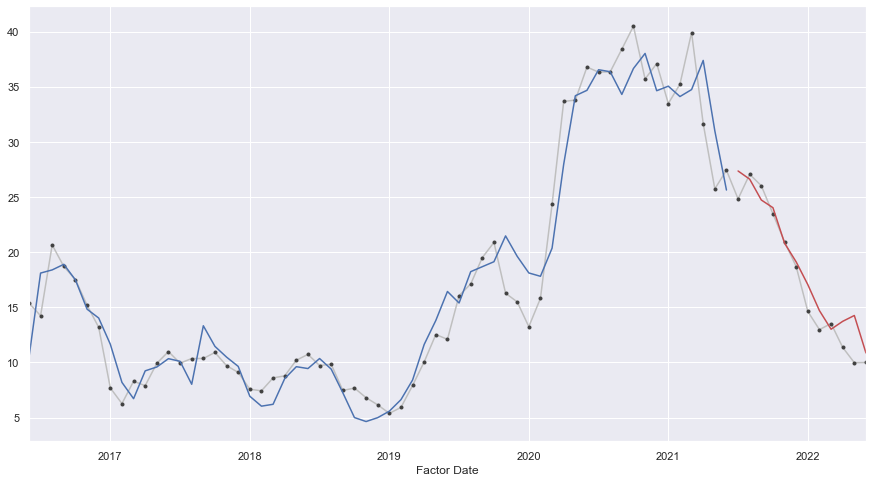

In [50]:
ax = y2.plot(**plot_params)
ax = y2_pred.plot(ax=ax)
_ = y2_fore.plot(ax=ax, color='C3')

This is the same as previous graphs. The grey dot line is a plot of historical data. Blue is a line that fitted by our simple linear regression. The red one is the prediction. Again, it is not too bad. 